https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/mnist/mnist_with_summaries.py

In [1]:
%matplotlib inline
import tensorflow as tf
# from utils.celeb import *
from utils.load_data import *
from utils.load_preprocessed import *
from utils.dataset import *
from utils.reporting import *
from utils.visualization import *

from IPython.display import display
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import IPython.display as ipyd
plt.style.use('ggplot')

In [2]:
#data_dir = "/home/data/images/"
#log_dir = "/home/logs/"

data_dir = "../data/MsCelebV1-Faces-Cropped.Samples/"
log_dir = "./test/logs"

In [3]:
n_entities = 4
n_images = 20
seed = 42
img_dims = 150

In [4]:
# face_cascade = cv2.CascadeClassifier('./utils/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('./utils/haarcascade_eye.xml')
face_cascade_dir = './utils/haarcascade_frontalface_default.xml'
eye_cascade_dir = './utils/haarcascade_eye.xml'

In [5]:
corpus_dir = "../data/crop_4_20/corpus"
bottleneck_dir = "../data/crop_4_20/bottleneck"

In [6]:
all_images, all_labels, all_bottles = load_preprocessed_data(corpus_dir, 
                                            bottleneck_dir, img_dims)
x_4d_shape = all_images.shape
all_images = np.ravel(all_images).reshape(all_images.shape[0], 
        all_images.shape[1] * all_images.shape[2] * all_images.shape[3])

In [7]:
print("all_labels", all_labels)
print("type(all_labels)", type(all_labels))

# #plt.imshow(img_conv.reshape(x_4d_shape[1],x_4d_shape[2],x_4d_shape[3]))
# pic = all_images[0].reshape(x_4d_shape[1],x_4d_shape[2],x_4d_shape[3])
# plt.imshow(pic)
# pic[0,0]

all_labels ['m.01dv9k' 'm.01dv9k' 'm.01dv9k' 'm.01dv9k' 'm.01dv9k' 'm.01dv9k'
 'm.01dv9k' 'm.01dv9k' 'm.01dv9k' 'm.01dv9k' 'm.01dv9k' 'm.01dv9k'
 'm.01dv9k' 'm.01dv9k' 'm.01dv9k' 'm.01dv9k' 'm.01dv9k' 'm.01dv9k'
 'm.01dv9k' 'm.01dv9k' 'm.026_q27' 'm.026_q27' 'm.026_q27' 'm.026_q27'
 'm.026_q27' 'm.026_q27' 'm.026_q27' 'm.026_q27' 'm.026_q27' 'm.026_q27'
 'm.026_q27' 'm.026_q27' 'm.026_q27' 'm.026_q27' 'm.026_q27' 'm.026_q27'
 'm.026_q27' 'm.026_q27' 'm.026_q27' 'm.026_q27' 'm.0410vn2' 'm.0410vn2'
 'm.0410vn2' 'm.0410vn2' 'm.0410vn2' 'm.0410vn2' 'm.0410vn2' 'm.0410vn2'
 'm.0410vn2' 'm.0410vn2' 'm.0410vn2' 'm.0410vn2' 'm.0410vn2' 'm.0410vn2'
 'm.0410vn2' 'm.0410vn2' 'm.0410vn2' 'm.0410vn2' 'm.0410vn2' 'm.0410vn2'
 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3'
 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3'
 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3' 'm.0bwftn3'
 'm.0bwftn3' 'm.0bwftn3']
type(all_labels) <class 'numpy.nda

In [8]:
split = [0.8, 0.0, 0.2]
### ds = Dataset(all_images, all_labels, split=split, one_hot=True, rnd_seed=seed)
ds = Dataset(all_images, all_labels, all_bottles, split=split, one_hot=True, rnd_seed=seed)

n_samples = ds.X.shape[0]
n_features = ds.X.shape[1]
n_classes = ds.Y.shape[1]

x_4d_shape

(80, 100, 100, 3)

In [9]:
# ds.Y[0:9]
ds.train.labels[0:9]

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]], dtype=int32)

t1[0]: 53.0
t1.shape: (30000,)
--
t1_exp.shape (1, 30000)
t1_exp[0]: [ 53.  39.  36. ...,  87.  80.  72.]
--
t1_uint.shape (1, 30000)
t1_uint[0]: [53 39 36 ..., 87 80 72]
--
t1_4d.shape (100, 100, 3)
t1_4d[0,0]: [53 39 36]


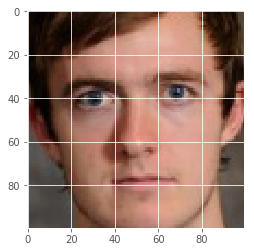

In [10]:
t1 = ds.train.images[7] #.reshape(x_4d_shape[1],x_4d_shape[2],x_4d_shape[3])
print("t1[0]:", t1[0])
print("t1.shape:", t1.shape)
#print("type",type(t1))
#plt.imshow(t1)
print("--")

#img_conv = np.expand_dims(img_sel, axis=0)
t1_exp = np.expand_dims(t1, axis=0)
print("t1_exp.shape", t1_exp.shape)
print("t1_exp[0]:", t1_exp[0])
print("--")

t1_uint = t1_exp.astype(np.uint8)
print("t1_uint.shape", t1_uint.shape)
print("t1_uint[0]:", t1_uint[0])
print("--")

t1_4d = t1_uint.reshape(x_4d_shape[1],x_4d_shape[2],x_4d_shape[3])
print("t1_4d.shape", t1_4d.shape)
print("t1_4d[0,0]:", t1_4d[0,0])

plt.imshow(t1_4d)

### Create placeholders

In [11]:
# Input placeholders
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, n_features], name='x-input')
    y_ = tf.placeholder(tf.float32, [None, n_classes], name='y-input')

with tf.name_scope('input_reshape'):
    #x_4d = tf.reshape(x, [-1, 100, 100, 3])
    x_4d = tf.reshape(x, [-1, x_4d_shape[1], x_4d_shape[2], x_4d_shape[3]])
    tf.summary.image('input', x_4d, 10)

### Create Variables for Weights and Variables

In [12]:
# We can't initialize these variables to 0 - the network will get stuck.

def weight_variable_xavier(name, shape):
    """Create a weight variable with appropriate initialization."""
    initial = tf.get_variable(
                            name=name,
                            shape=shape,
                            initializer=tf.contrib.layers.xavier_initializer_conv2d())
    return initial

def weight_variable(shape):
    """Create a weight variable with appropriate initialization."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """Create a bias variable with appropriate initialization."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, strides=[1,1,1,1]):
    return tf.nn.conv2d(x, W, strides=strides, padding='SAME')

def max_pool_2x2(x, ksize, strides):
    return tf.nn.max_pool(x, ksize=ksize,
                        strides=strides, padding='SAME')

In [13]:
#X must be 4D
def convolutions(X, n_filters, filter_sizes, filter_strides, activation=tf.nn.relu):
    current_in = X
    n_input_chs = X.get_shape().as_list()[3]
    Ws = []
    shapes = []

    # Build the encoder
    for layer_i, n_output_chs in enumerate(n_filters):
        with tf.variable_scope('convolution/{}'.format(layer_i)):
            shapes.append(current_in.get_shape().as_list())
            W = weight_variable_xavier(
                                name = "W{}".format(layer_i),
                                shape = [filter_sizes[layer_i], 
                                 filter_sizes[layer_i], 
                                 n_input_chs, n_output_chs])
            
            pre_activation = conv2d(current_in, W, filter_strides)
            h = activation(pre_activation)
            Ws.append(W)
            current_in = h
            n_input_chs = n_output_chs
            print("h.shape:", h.get_shape().as_list())
    shapes.append(current_in.get_shape().as_list())
    print("shapes:",shapes)
    return h, Ws

### Create Summaries for all var to include min/max/mean/std_dev

In [14]:
def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)

### Fully connected layer

In [15]:
def nn_layer(input_tensor, input_dim, output_dim, layer_name, act=tf.nn.relu):
    """Reusable code for making a simple neural net layer.
    It does a matrix multiply, bias add, and then uses relu to nonlinearize.
    It also sets up name scoping so that the resultant graph is easy to read,
    and adds a number of summary ops.
    """
    if (len(input_tensor.get_shape().as_list())==4):
        input_shape = input_tensor.get_shape().as_list()
        input_tensor = tf.reshape(input_tensor, [-1, input_shape[1]*input_shape[2]*input_shape[3]])
    
    # Adding a name scope ensures logical grouping of the layers in the graph.
    with tf.name_scope(layer_name):
      # This Variable will hold the state of the weights for the layer
        with tf.name_scope('weights'):
            weights = weight_variable([input_dim, output_dim])
            variable_summaries(weights)
        with tf.name_scope('biases'):
            biases = bias_variable([output_dim])
            variable_summaries(biases)
        with tf.name_scope('Wx_plus_b'):
            preactivate = tf.matmul(input_tensor, weights) + biases
            tf.summary.histogram('pre_activations', preactivate)
        activations = act(preactivate, name='activation')
        tf.summary.histogram('activations', activations)
        return activations, preactivate

In [16]:
def drop_layer(h, dropout):
    with tf.name_scope('dropout'):
        #keep_prob = tf.placeholder(tf.float32)
        #tf.summary.scalar('dropout_keep_probability', keep_prob)
        tf.summary.scalar('dropout_keep_probability', dropout)
        dropped = tf.nn.dropout(h, dropout)
    return dropped

# Configuration

In [17]:
#data_dir = "/home/data/images/"
#log_dir = "/home/logs/"
learning_rate_bottleneck = 0.00003
# learning_rate = 0.003
# learning_rate = 0.01
learning_rate = 0.001
epochs = 200
dropout = 0.8
FC_only = False
bottleneck_train = True

#Conv parameters
n_filters = [32, 32, 8]  #filter output sizes
filter_sizes = [4, 4, 2]  #
filter_strides = [1, 2, 2, 1]
#maxpool parameters
ksize = [1,2,2,1]
k_strides = [1,2,2,1]
#FC parameter
n_nodes = 100
final_layer = [n_classes]

#bottleneck layer
n_bottles = 2048

In [18]:
if not FC_only:
    h, Ws = convolutions(x_4d, n_filters, filter_sizes, filter_strides)
    h_shape = h.get_shape().as_list()
    print("h.shape:", h.get_shape().as_list())
    print("h[3]:", h.get_shape().as_list()[3])
    print("Ws:", Ws)

h.shape: [None, 50, 50, 32]
h.shape: [None, 25, 25, 32]
h.shape: [None, 13, 13, 8]
shapes: [[None, 100, 100, 3], [None, 50, 50, 32], [None, 25, 25, 32], [None, 13, 13, 8]]
h.shape: [None, 13, 13, 8]
h[3]: 8
Ws: [<tensorflow.python.ops.variables.Variable object at 0x11a70f198>, <tensorflow.python.ops.variables.Variable object at 0x11a70ff98>, <tensorflow.python.ops.variables.Variable object at 0x11a70f978>]


### Make a fully connected layer

In [19]:
#hidden1 = nn_layer(h, h, 500, 'layer1')
hidden1, pre_act_1 = nn_layer(h, h_shape[1]*h_shape[2]*h_shape[3], n_nodes, 'layer1')
print(hidden1)

Tensor("layer1/activation:0", shape=(?, 100), dtype=float32)


### Drop layer

In [20]:
dropped = drop_layer(hidden1, dropout)
#y, pre_act_2 = nn_layer(dropped, 100, n_classes, 'layer2', act=tf.identity)
hidden2, pre_act_2 = nn_layer(dropped, n_nodes, n_nodes, 'layer2')

In [21]:
bottleneck, bottleneck_pre_act = nn_layer(hidden2, n_nodes, n_bottles, 'bottleneck')

### Output layer

In [22]:
y, pre_act_3 = nn_layer(bottleneck, n_bottles, n_classes, 'layer3', act=tf.identity)

### Cross entropy cost function

In [23]:
with tf.name_scope('cross_entropy'):
    diff = tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)
    with tf.name_scope('total'):
        cross_entropy = tf.reduce_mean(diff)
tf.summary.scalar('cross_entropy', cross_entropy)

<tf.Tensor 'cross_entropy_1:0' shape=() dtype=string>

In [24]:
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

### Accuracy

In [25]:
with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.scalar('accuracy', accuracy)

<tf.Tensor 'accuracy_1:0' shape=() dtype=string>

### Feed data to feed_dict

In [26]:
train_mean = np.mean(ds.train.images,0)

def feed_dict(train):
    """Make a TensorFlow feed_dict: maps data onto Tensor placeholders."""
    #if train or FLAGS.fake_data:
        #xs, ys = mnist.train.next_batch(100, fake_data=FLAGS.fake_data)
        #k = FLAGS.dropout
    if train:
        xs, ys = ds.train.images - train_mean, ds.train.labels
        k = dropout
    else:    
        xs, ys = ds.test.images - train_mean, ds.test.labels
        k = 1.0
    #return {x: xs, y_: ys, keep_prob: k}
    return {x: xs, y_: ys}

### Summary writer and Create session

In [27]:
# Merge all the summaries and write them out to /tmp/tensorflow/mnist/logs/mnist_with_summaries (by default)
merged = tf.summary.merge_all()
#sess = tf.Session()
#sess.run(tf.global_variables_initializer())

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options,
        allow_soft_placement=True, log_device_placement=True))  
sess.run(tf.global_variables_initializer())

train_writer = tf.summary.FileWriter(log_dir + '/train', sess.graph)
test_writer = tf.summary.FileWriter(log_dir + '/test')

### Step1: Train on Bottlenecks

In [28]:
if bottleneck_train:
    batch_size = 20

    z = tf.placeholder(tf.float32, [None, 2048], name='z-input')

    #loss = tf.reduce_mean(tf.squared_difference(hidden1, z))
    loss = tf.reduce_mean(tf.squared_difference(bottleneck, z))
    MSE = tf.reduce_mean(loss)

    optimizer_MSE = tf.train.AdamOptimizer(learning_rate_bottleneck).minimize(MSE)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    for epoch_i in range(epochs):

        total_cost = []

        for batch_X, _, batch_Z in ds.train.next_batch(batch_size=batch_size):

            this_cost, _ = sess.run([MSE, optimizer_MSE], feed_dict={x: batch_X - train_mean, z: batch_Z})

            total_cost = total_cost + this_cost

        if epoch_i%10 == 0:
            avg_cost = this_cost / (ds.X.shape[0] / batch_size)
            print(epoch_i, avg_cost)

    #test_hash = feed_dict(False)
    #summary, acc, y = sess.run([merged, accuracy, y], feed_dict=feed_dict(False))
    #test_writer.add_summary(summary, i)
    #print('Test Accuracy: %s' % (acc))

0 8.99847316742
10 1.46831524372
20 0.773377299309
30 0.528178572655
40 0.366149991751
50 0.227767944336
60 0.206059485674
70 0.170043483377
80 0.128671526909
90 0.123637832701
100 0.0884760096669
110 0.0938171744347
120 0.0737502127886
130 0.0776834189892
140 0.0772566944361
150 0.0672658905387
160 0.066790021956
170 0.0618380047381
180 0.0541877523065
190 0.0550663098693


### Step 2: Train on Image Class

In [29]:
batch_size = 20

finalRepresentations = []
for i in range(epochs):
    
    if i%10 == 0:
        # Train accuracy report
        summary, acc = sess.run([merged, accuracy], feed_dict=feed_dict(True))
        train_writer.add_summary(summary, i)
        print('Train accuracy at step %s: %s' % (i, acc))
        finalRepresentations.append(pre_act_2.eval(session=sess, feed_dict=feed_dict(True)))
    else:
        # Train network
        for batch_X, batch_Y, _ in ds.train.next_batch(batch_size=batch_size):
            summary, _ = sess.run([merged, train_step], feed_dict={x: batch_X, y_: batch_Y})
            train_writer.add_summary(summary, i)

test_hash = feed_dict(False)
summary, acc, y = sess.run([merged, accuracy, y], feed_dict=feed_dict(False))
test_writer.add_summary(summary, i)
print('Test Accuracy: %s' % (acc))

report(y, ds, n_classes)

train_writer.close()
test_writer.close()
#sess.close()

Train accuracy at step 0: 0.234375
Train accuracy at step 10: 0.359375
Train accuracy at step 20: 0.484375
Train accuracy at step 30: 0.390625
Train accuracy at step 40: 0.40625
Train accuracy at step 50: 0.4375
Train accuracy at step 60: 0.484375
Train accuracy at step 70: 0.5625
Train accuracy at step 80: 0.46875
Train accuracy at step 90: 0.6875
Train accuracy at step 100: 0.515625
Train accuracy at step 110: 0.5625
Train accuracy at step 120: 0.453125
Train accuracy at step 130: 0.296875
Train accuracy at step 140: 0.375
Train accuracy at step 150: 0.421875
Train accuracy at step 160: 0.40625
Train accuracy at step 170: 0.421875
Train accuracy at step 180: 0.421875
Train accuracy at step 190: 0.40625
Test Accuracy: 0.375

Train Class Distribution


,0,1,2,3
distribution,17,15,17,15



Test Class Distribution


,0,1,2,3
distribution,3,5,3,5



Train Results


,value
prec ovall,0.509
recall overall,0.400
f1 overall,0.407



Test Results by Class


,0,1,2,3
prec,0.500,0.250,1.000,0.286
recall,0.667,0.200,0.333,0.400
f1,0.571,0.222,0.500,0.333


## Other Results

### Activation

In [30]:
g = tf.get_default_graph()
[op.name for op in g.get_operations()]

['input/x-input',
 'input/y-input',
 'input_reshape/Reshape/shape',
 'input_reshape/Reshape',
 'input_reshape/input/tag',
 'input_reshape/input',
 'convolution/0/W0/Initializer/random_uniform/shape',
 'convolution/0/W0/Initializer/random_uniform/min',
 'convolution/0/W0/Initializer/random_uniform/max',
 'convolution/0/W0/Initializer/random_uniform/RandomUniform',
 'convolution/0/W0/Initializer/random_uniform/sub',
 'convolution/0/W0/Initializer/random_uniform/mul',
 'convolution/0/W0/Initializer/random_uniform',
 'convolution/0/W0',
 'convolution/0/W0/Assign',
 'convolution/0/W0/read',
 'convolution/0/Conv2D',
 'convolution/0/Relu',
 'convolution/1/W1/Initializer/random_uniform/shape',
 'convolution/1/W1/Initializer/random_uniform/min',
 'convolution/1/W1/Initializer/random_uniform/max',
 'convolution/1/W1/Initializer/random_uniform/RandomUniform',
 'convolution/1/W1/Initializer/random_uniform/sub',
 'convolution/1/W1/Initializer/random_uniform/mul',
 'convolution/1/W1/Initializer/rand

(1, 30000)


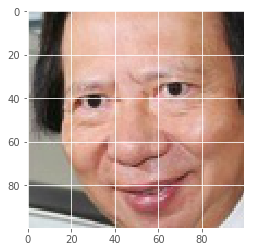

In [31]:
#pick an image from the test set
img_sel = ds.test.images[0]

img_conv = np.expand_dims(img_sel, axis=0).astype(np.uint8)
print(img_conv.shape)

plt.imshow(img_conv.reshape(x_4d_shape[1],x_4d_shape[2],x_4d_shape[3]))

In [32]:
conv_out= g.get_tensor_by_name('convolution/0/Relu:0')
img_conv = np.expand_dims(img_sel, axis=0)
conv_layer = conv_out.eval(session=sess, feed_dict={x:img_conv})
conv_layer.shape

(1, 50, 50, 32)

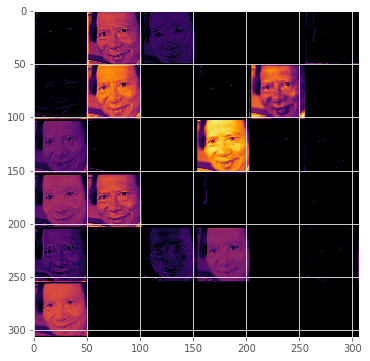

In [33]:
# Activations of the first convolution layer
mont_conv = montage_filters(np.rollaxis(np.expand_dims(conv_layer[0], 3), 3, 2))
plt.figure(figsize=(6,6))
plt.imshow(mont_conv, cmap='inferno')

## T-SNE

#### Reduce the dimensions to two to view how the celeberity images are clustering

In [34]:
finalRepresentations[-1].shape

(64, 100)

In [35]:
tsne = TSNE(perplexity=50, n_components=2, init='pca', n_iter=5000)
lowDWeights = tsne.fit_transform(finalRepresentations[-1])

In [36]:
y_target_idx = np.argmax(ds.train.labels, 1)

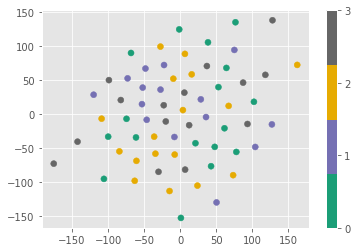

In [37]:
plt.scatter(lowDWeights[:,0], lowDWeights[:,1], c = y_target_idx, cmap=plt.cm.get_cmap('Dark2', n_classes))
plt.colorbar(ticks=range(n_classes))